<a href="https://colab.research.google.com/github/D-Beall/MachineLearning/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

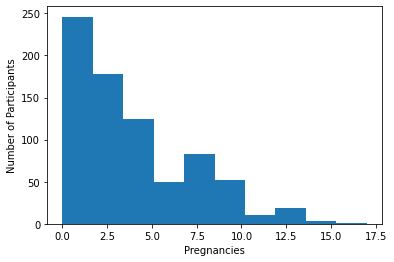

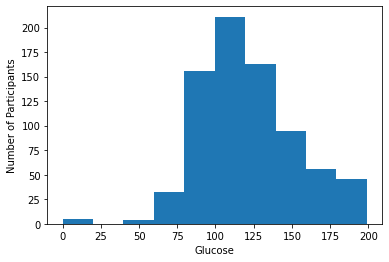

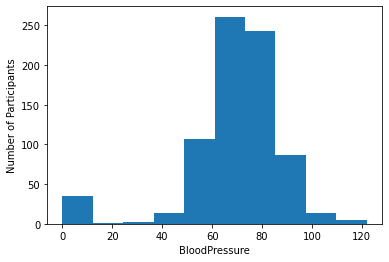

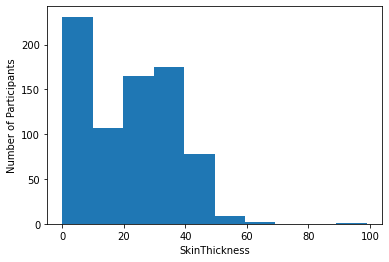

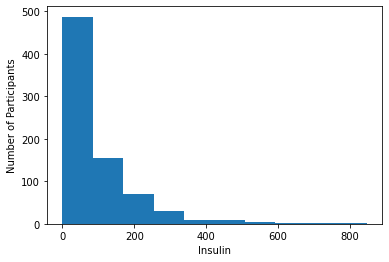

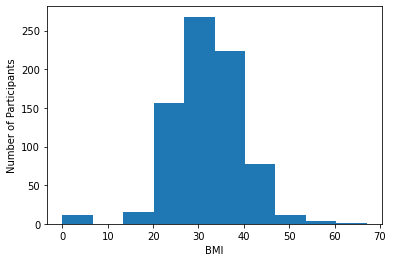

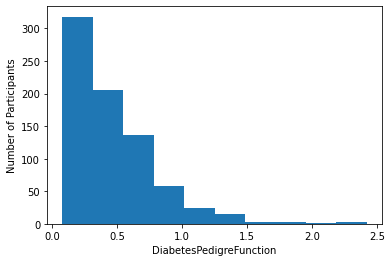

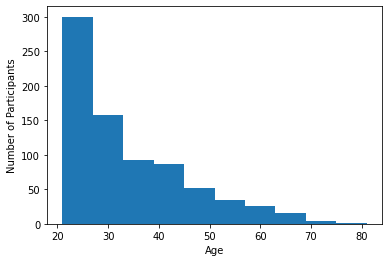

In [47]:
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
labels=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreFunction","Age","Outcome"]

diabetes = genfromtxt('./drive/My Drive/Machine Learning/Project 1/diabetes.csv',skip_header=1,delimiter=',')
for i in range(len(labels)-1):  
  u = diabetes[:,i]
  plt.hist(u)
  plt.xlabel(labels[i])
  plt.ylabel("Number of Participants")
  plt.savefig("./drive/My Drive/Machine Learning/Project 1/"+labels[i]+".png")
  plt.show()



In [48]:
#Seperate labels from feature data
diab_y = diabetes[:,-1]
diab_x = diabetes[:,0:len(labels)-1]

**Alogrithm Description:** 
  
  Feature Scaling-
  This data set has too many features to be efficently used for KNN. So Principal Component Analysis will attempt to bring the dimensionality of the data down.

In [50]:
#defin helper functions and knn functions.
import math
import sys
def dist(i,j,p):#Minkowski Distance formula
  #Returns the distance between i and j.
  #i,j nodes with at least any number of features.
  #p- power used to create different distance formulas
  #p=1 Manhattan p=2 Euclidean, p=infinity maximum norm
  temp = 0
  for q in range(0,len(i)):#Loop through each feature.
    if i[q] == j[q]:
      continue
    temp += math.pow(abs(i[q]-j[q]),p)


  return math.pow(temp,(1/p))

def vote(n,cl):
    #Using neighbors votes on new classification.
    #m-Array of neighbors containing a tuple with the index in 1st position.
    #cl- array of classifications to use for vote.
    pos = 0
    neg = 0
    for x in n:
      if cl[x[0]] == 1:
        pos += 1
      else:
        neg += 1
    if pos > neg:
      return 1
    else:
      return 0

#Run KNN on pca data. Use PC1 and PC2 to calculate distance for each point.
def knn(x,y,k,p,df,rs):
  #x-array of data samples with each entry containing the feature information.
  #y-array of classifications for each sample.
  #k-number of neighbors to classify.
  #p-percentage of points that prepopulate the algorithm.
  #df-integer used to denote which distance function to use.
  #rs-integer used to set random state for test/train split.
  y_predictions = []

  #Seperate prepopulation from training population.
  x_train, x_pre, y_train, y_pre = train_test_split(x,y, test_size=p, random_state=rs)
  current_graph = x_pre
  current_classifications = y_pre
  #Loop through x_train
  for sample in x_train:
    #Calculate the distance of sample to every other node
    sn_distance = [] #Sample's neighbor distances.
    for i in range(0,len(current_graph)):
      #Calculate distance from sample for each node in graph.
      pn = current_graph[i]
      d = dist(sample,pn,df)
      #add d and i to sn_distances
      sn_distance.append((i,d))
    #Sort sn_distance
    sn_distance.sort(key=lambda tup: tup[1])
    #Create neighbors
    sn_neighbors = sn_distance[0:k]
    #Vote on new classification.
    res = vote(sn_neighbors, current_classifications)
    #Add result to y_predictions and add sample to current_graph/classifications
    y_predictions.append(res)
    current_graph = np.append(current_graph,[sample],axis=0)
    current_classifications = np.append(current_classifications,res)
  

  #TEMP PRINT RESULTS OF PREDICTION
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for w in range(0,len(y_predictions)):
    pred = y_predictions[w]
    act = y_train[w]
    if pred == 1 and act == 1:
      tp += 1
    elif pred == 1 and act == 0:
      fp += 1
    elif pred == 0 and act == 0:
      tn += 1
    elif pred == 0 and act == 1:
      fn += 1
  correct = tp + tn
  wrong = fp + fn
  total = correct + wrong
  accuary = correct/total
  sensitivity = tp/(tp+fn)
  specificity = tn/(tn+fp)
  print("True Positive: " + str(tp))
  print("True Negative: " + str(tn))
  print("False Positive: " + str(fp))
  print("False Negative: " + str(fn))
  print("Correct: " + str(correct))
  print("Incorrect: " + str(wrong))
  print("Accuracy: " + str(accuary))
  print("Sensitivity: " + str(sensitivity))
  print("Specificity: " + str(specificity))

In [51]:
from sklearn import preprocessing

scaled_diab_x = preprocessing.scale(diab_x)

In [52]:
scaled_diab_x.shape

(768, 8)

In [61]:
import timeit
st = timeit.default_timer()
num_neigh = 5
test_per=0.20
ran=66
knn(scaled_diab_x,diab_y,num_neigh,test_per,1,ran)
print("------------------")
knn(scaled_diab_x,diab_y,num_neigh,test_per,2,ran)
print("------------------")
knn(scaled_diab_x,diab_y,num_neigh,test_per,100,ran)
print("------------------")
diff = timeit.default_timer() - st

True Positive: 72
True Negative: 353
False Positive: 39
False Negative: 150
Correct: 425
Incorrect: 189
Accuracy: 0.6921824104234527
Sensitivity: 0.32432432432432434
Specificity: 0.9005102040816326
------------------
True Positive: 63
True Negative: 359
False Positive: 33
False Negative: 159
Correct: 422
Incorrect: 192
Accuracy: 0.6872964169381107
Sensitivity: 0.28378378378378377
Specificity: 0.9158163265306123
------------------
True Positive: 46
True Negative: 369
False Positive: 23
False Negative: 176
Correct: 415
Incorrect: 199
Accuracy: 0.6758957654723127
Sensitivity: 0.2072072072072072
Specificity: 0.9413265306122449
------------------


In [63]:
num_neigh = 5
test_per=0.20
ran=66
st = timeit.default_timer()
knn(scaled_diab_x,diab_y,num_neigh,test_per,1,ran)
diff = timeit.default_timer() - st

True Positive: 72
True Negative: 353
False Positive: 39
False Negative: 150
Correct: 425
Incorrect: 189
Accuracy: 0.6921824104234527
Sensitivity: 0.32432432432432434
Specificity: 0.9005102040816326


In [64]:
print(diff)

2.645945352000126


In [65]:
#Digit Recognizer Section
from PIL import Image
digits = genfromtxt('./drive/My Drive/Machine Learning/Project 1/digittrain.csv',delimiter=',')


In [66]:
digits = digits[1:] #Remove labels

In [67]:
digits_c = digits #Copy because it takes so long to load values.

In [68]:
#Remove all columns that contain the same values
col_to_remove = []
for z in range(0,len(digits[0])):
  add = True
  temp = digits[0][z]
  for w in range(0,len(digits)):
    if temp != digits[w][z]:
      add = False
      break
  if add:
    col_to_remove.append(z)
  

In [69]:
print(col_to_remove)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 53, 54, 55, 56, 57, 58, 83, 84, 85, 86, 112, 113, 140, 141, 142, 169, 197, 393, 421, 422, 449, 477, 533, 561, 645, 646, 672, 673, 674, 700, 701, 702, 728, 729, 730, 731, 732, 755, 756, 757, 758, 759, 760, 761, 781, 782, 783, 784]


In [70]:
print(len(col_to_remove))

76


In [71]:
#Remove columns that share all same values(most likely all zeroes)
digits = np.delete(digits,col_to_remove,1)

In [72]:
digits.shape

(42000, 709)

In [ ]:
from random import randint
#Set digit labels
dig_labels =  []
for i in range(0,len(digits[0])-1):
  dig_labels.append("pixel"+str(i))
#Display some images from data set.
w, h = 28, 28
rand_images=[]
for i in range(0,10):
  rand_images.append(randint(0,len(digits)))
images=[]
file_n = 10
for x in rand_images:
  data = np.reshape(digits[x][1:],(28,28))
  img = Image.fromarray(data)
  img = img.convert('L')
  img.save('./drive/My Drive/Machine Learning/Project 1/Digits Images/'+str(file_n)+".png")
  images.append(img)
  file_n += 1

images[0]

Edit data so that the label reflects positive or negative for a single digit.

In [74]:
def setdata(dig,num):
  #dig data set of digit info to change label to.
  #num- int of data to test for.
  for x in dig:
    if x[0] == num:
      x[0] = 1
    else:
      x[0] = 0
  return dig
new_dig = setdata(digits[:],1)#new dig is both features and labels without header, but labels are just pos neg

In [76]:
print(new_dig[0][0:5])

[1. 0. 0. 0. 0.]


In [78]:
#Shuffle new_dig to get a random sample for smaller dig_x/y
np.random.shuffle(new_dig)

In [79]:
#Setup x and y for digit data.
new_dig_x = new_dig[:,1:]
new_dig_y = new_dig[:,0]

In [90]:
small_dig_x = new_dig_x[0:200]
small_dig_y = new_dig_y[0:200]

In [84]:
small_dig_x.shape

(300, 708)

In [91]:
num_neigh = 1
test_per=0.20
ran=66
knn(small_dig_x,small_dig_y,num_neigh,test_per,1,ran)

True Positive: 17
True Negative: 122
False Positive: 21
False Negative: 0
Correct: 139
Incorrect: 21
Accuracy: 0.86875
Sensitivity: 1.0
Specificity: 0.8531468531468531


In [92]:
knn(small_dig_x,small_dig_y,num_neigh,test_per,2,ran)

True Positive: 17
True Negative: 129
False Positive: 14
False Negative: 0
Correct: 146
Incorrect: 14
Accuracy: 0.9125
Sensitivity: 1.0
Specificity: 0.9020979020979021


In [94]:
st = timeit.default_timer()
knn(small_dig_x,small_dig_y,num_neigh,test_per,100,ran)
diff = timeit.default_timer() - st

True Positive: 17
True Negative: 136
False Positive: 7
False Negative: 0
Correct: 153
Incorrect: 7
Accuracy: 0.95625
Sensitivity: 1.0
Specificity: 0.951048951048951


In [95]:
print(diff)

7.519094840999969
